<h1>Predicting Customer Churn in a Telecom Company</h1>
<p>This notebook is to demonstrate a simple machine learning problem using Jupyter notebooks and the datascience.com platform. The dataset that I've used in this example is from telecom customer data set which can be downloaded <a href="http://www.dataminingconsultant.com/data/churn.txt"> here </a> </p>
<p>Each record in this dataset is a customer of this company and has customer attributes such as phone number, call minutes and so on. The dependent variable is 'Churn', which indicates if the customer is still a customer or has cancelled the service. And as expected - our goal in this exercise is to predict if the customer will churn or not, based on the attributes that are readily available to us.</p>

# Importing the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_curve
import numba
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

### Let's take a look at what columns are part of the dataset and what a sample of the dataset looks like :

Use pandas read_csv function to read the file from the url above. 
``` python
churnData = pd.read_csv('http://www.dataminingconsultant.com/data/churn.txt')
```

In [3]:
churnData = pd.read_csv('http://www.dataminingconsultant.com/data/churn.txt')

Columns in the dataset : 

In [4]:
for i in churnData.columns.tolist():
    print(i)

State
Account Length
Area Code
Phone
Int'l Plan
VMail Plan
VMail Message
Day Mins
Day Calls
Day Charge
Eve Mins
Eve Calls
Eve Charge
Night Mins
Night Calls
Night Charge
Intl Mins
Intl Calls
Intl Charge
CustServ Calls
Churn?


A sample of the dataset : 

In [5]:
churnData.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


Check the column datatypes : 

In [6]:
print(churnData.dtypes)

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object


In [7]:
# convert the ones with object to string 
obj_col = churnData.select_dtypes(include =[np.object]).columns.tolist()

['State', 'Phone', "Int'l Plan", 'VMail Plan', 'Churn?']


In [8]:
churnData[obj_col] = churnData[obj_col].astype('str')

In [9]:
print(churnData.dtypes)

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object


## Exploratory analysis
Let's do some exploratory analysis to learn more about the dataset.
We'll start with looking at some preliminary distributions. 


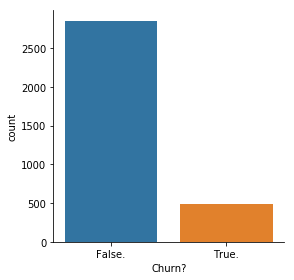

In [10]:
sns.factorplot( 'Churn?', data=churnData, kind = 'count')

The above visualization shows the distribution of the churned customers vs the non-churned customers in the dataset. Now lets compare the other variables in the dataset against churn? and see if it is indicative of anything. 

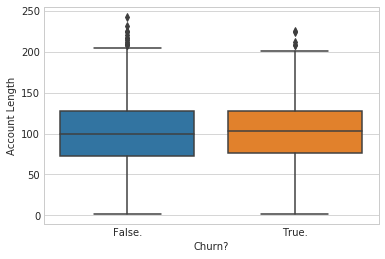

In [66]:
sns.set_style("whitegrid")
sns.boxplot(x="Churn?", y="Account Length", data=churnData)

It's interesting to observe that the account duration has no effect on the customers decision to churn. 

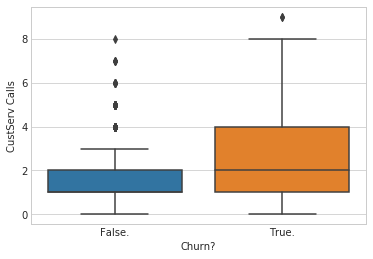

In [11]:
sns.set_style("whitegrid")
sns.boxplot(x="Churn?",y="CustServ Calls",data=churnData)

We see that the range of average number of customer service calls by customers who ended up churning are a bit wider than the ones that didn't end up churning. Though the results isn't statistically significant at this point, this could be a feature that will help us predict if a customer churns or not

We could continue our exploration and draw plots with other variables to observe their relationship amongst the independent and dependent variables. But for the sake of this demo, i'll stop here and proceed to predictive modelling stage. 

## Preparing the data for modelling 
In this example, we'll use the random forest model to predict if the customer churns or not. We need to prepare our dataset for modelling, for example, change strings into numeric factors that the model can understand or remove variable that we don't think will be useful in the modelling process. 

The dependent variable is presently 'True.' or 'False.' We need to change this to 1 and 0 to give a boolean representation to this. 

In [12]:
churnData['Churn'] = churnData['Churn?'].map(lambda x: 1 if x=='True.' else 0)

Let's remove the variables that we think won't be useful in this example. In this case, we'll remove the Area Code ,Phone, State. We'll also remove the Churn? variable now that we have encoded the value in the 'Churn' variable instead. 

In [13]:
# remove columns that we won't use 
churnData1 = churnData.drop(['Area Code','Phone','State','Churn?'],axis=1)

Convert the object variables and create dummy variables. 

In [40]:
# find out which columns are object type and convert them to dummy vars
list_ = list(churnData1.select_dtypes(include=[np.object]).columns)
churnData2 = pd.get_dummies(churnData1, prefix=list_)

Let's take a look at the data set now and them combine them with the rest of the dataset

In [41]:
churnData2.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


In [16]:
# # merge with the other columns
# list_nonObj = list(churnData.select_dtypes(exclude=['object']).columns)
# churnData3 = churnData[list_nonObj]

In [44]:
inputData = churnData2

### Final Input Dataset
This is what our final input dataset looks like. 

In [45]:
inputData.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


We'll split the dataset into training and testing datasets. 

In [46]:
# split the input data set into train and test 
churnData_train, churnData_test = train_test_split(inputData, test_size =0.3)

Get the list of input features

In [47]:
features = inputData.drop(['Churn'], axis=1).columns

### Training the model 
We'll pass the input dataset to the random forest classifier to generate the model that will predict customer churn.

In [48]:
rcClassifier = RandomForestClassifier(n_estimators=40)
rcClassifier.fit(churnData_train[features], churnData_train['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Making Predictions
We'll pass our test set into the model to get the predictions and the probabilty associated with each prediction

In [49]:
# Make Predictions
predictions = rcClassifier.predict(churnData_test[features])
probabilities = rcClassifier.predict_proba(churnData_test[features])

In [50]:
score = rcClassifier.score(churnData_test[features],churnData_test['Churn'])
print "Accuracy : ", score

Accuracy :  0.96


In [53]:
featureImportances = rcClassifier.feature_importances_
featureImportanceIndex = np.argsort(rcClassifier.feature_importances_)[::-1]
featureLabels = churnData_test.columns


19
19


In [55]:
columnsImportant = churnData_test.iloc[:,featureImportanceIndex.tolist()].columns

## Plotting the feature importances 
Let's take a look at what feature is important to predict if a customer will churn. 

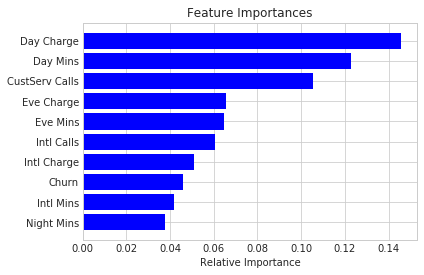

In [57]:
plt.title("Feature Importances")
plt.barh(range(10), featureImportances[featureImportanceIndex][:10][::-1], color='b', align='center')
plt.yticks(range(10), columnsImportant[:10][::-1]) 
plt.xlabel('Relative Importance')
plt.show()

We observe that day charge,  day minutes, customer service calls  are the some of the important features that the model suggests. Let's plot the day charge, evening charge, and night charge and observe if there is any difference between them.

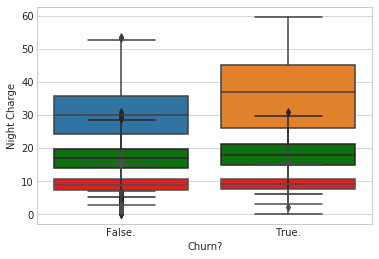

In [65]:
sns.boxplot(y='Day Charge', x = 'Churn?', data=churnData)
sns.boxplot(y='Eve Charge', x = 'Churn?', data=churnData,color='g')
sns.boxplot(y='Night Charge', x = 'Churn?', data=churnData, color ='r')

### Recommendations 
1. Reduce day charges. 
2. Bring on some loyalty program

In [ ]:
# function that takes a input dataset without the churn column and returns predictions, probabilities
@numba.jit
def predictCustChurn(x):
    x = pd.read_json(x,orient='split')
    print x
    pred = rcClassifier.predict(x)
    probs = rcClassifier.predict_proba(x)
    return {'pred':pred,'probs':probs}
    
    

In [ ]:
retVal = predictCustChurn(churnData_test[features][:10].to_json(orient='split'))

In [ ]:
print retVal['pred']

In [ ]:
x = {"columns":["Account Length","Account Length","VMail Message","VMail Message","Day Mins","Day Mins","Day Calls","Day Calls","Day Charge","Day Charge","Eve Mins","Eve Mins","Eve Calls","Eve Calls","Eve Charge","Eve Charge","Night Mins","Night Mins","Night Calls","Night Calls","Night Charge","Night Charge","Intl Mins","Intl Mins","Intl Calls","Intl Calls","Intl Charge","Intl Charge","CustServ Calls","CustServ Calls","Int'l Plan_no","Int'l Plan_yes","VMail Plan_no","VMail Plan_yes","Account Length","Account Length","Area Code","VMail Message","VMail Message","Day Mins","Day Mins","Day Calls","Day Calls","Day Charge","Day Charge","Eve Mins","Eve Mins","Eve Calls","Eve Calls","Eve Charge","Eve Charge","Night Mins","Night Mins","Night Calls","Night Calls","Night Charge","Night Charge","Intl Mins","Intl Mins","Intl Calls","Intl Calls","Intl Charge","Intl Charge","CustServ Calls","CustServ Calls"],"index":[0,1],"data":[[128,128,25,25,265.1,265.1,110,110,45.07,45.07,197.4,197.4,99,99,16.78,16.78,244.7,244.7,91,91,11.01,11.01,10.0,10.0,3,3,2.7,2.7,1,1,1,0,0,1,128,128,415,25,25,265.1,265.1,110,110,45.07,45.07,197.4,197.4,99,99,16.78,16.78,244.7,244.7,91,91,11.01,11.01,10.0,10.0,3,3,2.7,2.7,1,1],[107,107,26,26,161.6,161.6,123,123,27.47,27.47,195.5,195.5,103,103,16.62,16.62,254.4,254.4,103,103,11.45,11.45,13.7,13.7,3,3,3.7,3.7,1,1,1,0,0,1,107,107,415,26,26,161.6,161.6,123,123,27.47,27.47,195.5,195.5,103,103,16.62,16.62,254.4,254.4,103,103,11.45,11.45,13.7,13.7,3,3,3.7,3.7,1,1]]}
predictCustChurn(x)
print n